<a href="https://colab.research.google.com/github/TivsLThree/CAP-4630-Artificial-Intelligence/blob/master/Homework/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Concepts

Machine learning may have a few definitions. Here are some of the onse given in this class:


*   A branch of computer science dealing with the simulation of intelligent behavior in computers.
*   The capability of a machine to imitate intelligent human behavior.
*   A Computer system able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages. 


More generally, machine learning can be thought of as "the science and engineering of making intelligent machines." - John McCarthy


Machine learning programs are able to adujust themselves in response to the data that they are exposed to (the data that we feed it.)

A more typical program (say a symbolic AI) may function in a way similar to this:

In [0]:
def function(input, rules):
  # do whatever
  return output;

However, machine learning is different in its ability modify itself and functions more like this:

In [0]:
def function(input, output):
  # do whatever
  return rules;

## Machine Learning, Artificial Intelligence, & Deep Learning

*    Machine learning was defined above.
*    Artificial intelligence is the study of smart actors: any device that can see and interact with its environment in order to achive some goal. 
*    Deep learning is a broad section of techniques that are based in artificial neural networks. 
<br><br>
The three are similar concepts that can be thought of as a set of Matryoshka dolls. Deep learning is a subset of machine learning, which is a subset of AI.
$${\displaystyle \textrm{Deep Learning}\subseteq \textrm{Machine Learning}\subseteq\textrm{Artificial Intelligence}}$$





## Supervised, Unsupervised, & Reinforcement Learning

*    Supervised learning contains labeled training data. In order to train this type of network, you must have access to a dataset and they must have labels corresponding to them that reveal what 'class' they come from.
*    Unsupervised learning contains no labeled data, and the network must catorgorize each piece of data and infer its own rules for doing so. The goal is to identify meaningful patterns in data. Then, when the network gets new data it will be able to catagorize them easily. 
*    Reinforcement learning (RL) you do not collect exmaples with labels. This type of model attempts to play a game without losing. Essentially, you can reward or punish it for certain actions so that it learns how to 'win' whatever game or task you have it set to. 

## Classification & Regression
A Regression model predicts continuous values. They can answer questions like the following:

*    How expensive is gas?
*    What is the probability the stock market will be above a certain threshold tomorrow?

A Classification model predicts discrete values. They can make predictions that answer questions imilar to the following:
*    Is this a cat, dog, horse, or cow?
*    Is this tweet made my a specific user?
*    Is this song pop or rock?

# Basic Concepts

## Linear Regression
Linear regression is an approach to model the relationship between two variables. Essentially, it aproximates the best line to 'connect' the pieces of data, though it is usually impossible to obtain an exact line  that goes through all points, as they may not all lie on the same line.
In the case of machine learning, the equation is typically written like this:
$$\hat{y} = b + w_i x_i$$


where
* y is the predicted label
* b is the bias (the y-intercept), sometimes referred to as w_0
* w_1 is the weight at feature 1. Weight is the same concept as the "slope" m in the traditional equation of a line.
* x_1 is a feature



In [0]:
class Model:
  def __init__(self, lr=0.1, i_count=2000, verbose=True):
    self.verbose = verbose
    self.lr = lr;
    self.i_count = i_count;
  def __sigmoid(self, z):
    return 1/(1+np.exp(-z))
  def __loss(self, a, y):
    return (-y * np.log(a) - (1 - y) * np.log(1 - a)).mean() # Loss function effectively as a percentage
  def fit(self, x, y):
    losses = []
    b = np.ones((x.shape[0], 1))
    x = np.concatenate((b,x), axis=1);
    
    self.theta = np.zeros((x.shape[1],1))

    for i in range(self.i_count):
      z = np.dot(x, self.theta)
      a = self.__sigmoid(z);
      # (a - y) * x_j
      gradient = np.dot(x.T, a - y) / y.shape[0]
      self.theta -= self.lr * gradient
      if self.verbose and i % 10 == 0:
        z = np.dot(x, self.theta);
        a = self.__sigmoid(z);
        loss = self.__loss(a, y);
        losses.append(loss)
    return losses
  # Returns the predictions and loss as well
  def predict(self, x, y):
    b = np.ones((x.shape[0], 1));
    x = np.concatenate((b,x), axis=1);
    res = self.__sigmoid(np.dot(x, self.theta));
    return (np.array([i[0] for i in res ]), self.__loss(res, y))
m = Model()
# reshape everything to fit correctly
#losses = m.fit(x, Z)

## Training & Loss
Empirical risk minimization. 
*   Training a model means examining the examples and adjusting the weights and the bias so that the loss is minimized. 
*   Loss is the penalty for a bad prediction, that is, it quantifies how bad the model's prediction was on a single example. Perfect predictions receive a loss of 0 while all other predictions are some value > 0.
*   Overall, the goal is to find the best set of weights and biases that achieve a low average loss across all given examples. 

There are many different loss functions, but the most common one for linear regression is squared loss $${(L_2)}$$

The convention for the weights+bias is to include them in the same weight vectoor/matrix.
x is the collection of samples. 
$${w = (b, w_1, w_2,..., w_n)}$$
$${x = (x_1, x_2, x_3,..., x_n)}$$
A model will make a prediction with:
$$\hat{y}= b + \sum_{j=1}^{n} w_jx_j$$
$$\hat{y}= w_0* + \sum_{j=1}^{n} w_jx_j$$
When given a prediction and the actual value, the square loss function returns the loss by:
$${(y - \hat{y})}^{2}$$

Alternatively, Mean Square Error is defined as:
$$\frac{1}{m}\sum_{i=1}^{n}{(y^{(i)} - \hat{y}^{(i)})}^{2}$$

## Gradient & Gradient Descent

Gradient descent is a technique to iteratively update and aproximate the correct values for the weights and biases of a network. 
We perform gradient descent on the loss function by taking the gradient with respect to each weight and bias of the loss function after every training batch. Then, we update the weights and biases by subtracting a fraction of the gradient from the weight. This is typically done in a vectorized fashion to simplify the updates.

A simple implemention of gradient descent with linear regression can be seen in the following:

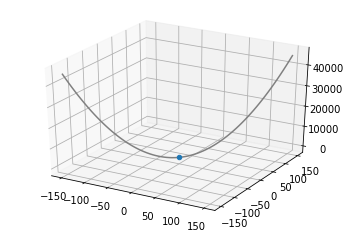

In [27]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
  return  x**2 + y**2
fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.linspace(-150, 150, 80)
y = np.linspace(-150, 150, 80)

ax.scatter(0,0,0)
ax.plot3D(x,y,f(x,y), 'gray')

In this graph we can see a function and the clear minimum. Gradient descent will start somewhere else on the line, maybe near the top (depending on the random weights), and slowly update it's weights until it arrives that the minimum at the bottom. 
Updating the weights is accomplished like this:
$${w\ \mathrel{-}=  \alpha\nabla\mathcal{L}}$$

## Logistic Regression

While linear regression attempts to predict a relationship be aproximating a line, logistic regression attempts to classify while using a similar equation.
A neural network will have many layers each with potentially many neurons in each layer, connected to the neurons in the next layer. 
Each neuron will implement a function in two steps. 
First, sum all the connects and inputs from previous layers' neurons. 
Then, pass that result through the neuron's activation function before passing it on to the next layer. 
$${w = (b, w_1, w_2,..., w_n)}$$
$${x = (x_1, x_2, x_3,..., x_n)}$$

Step 1.
$$ z= b + \sum_{j=1}^{n} w_jx_j$$

Step 2.
$$ a = \textrm{activation_function}(z)$$

For logistic regression, the activation function is equal to the sigmoid function which is defined by 
$$\sigma(z) = \frac{1}{1+ e^{-z}} $$

The sigmoid function squeezes its outputs to be within (0,1).
The following code shows that and a few other activation functions. 

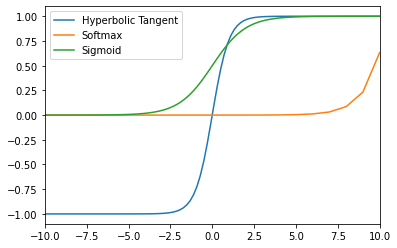

In [28]:
from scipy.special import softmax
xs = np.linspace(-10,10,100)
plt.plot(xs, np.tanh(xs), label='Hyperbolic Tangent');
plt.xlim(-10,10)
plt.plot(range(-11,11), softmax(range(-11,11)), label='Softmax')
plt.plot(xs, 1/(1+np.exp(-xs)), label='Sigmoid')
plt.legend();

# Building a Convolutional Neural Network w/ Keras




Convolutional neural networks are incredibly powerful networks that are used widely but primarly used for image classification. These networks are able to accomplish such great feats because of the layers within them.\

Instead of preprocessing the data to derive features like textures or shapes, a CNN takes the image's raw pixel data as input and learns how to extract features, before eventually learning to classify the entire image. 

Firstly, CNNs receieve a 3d matrix representing the image. 
The first and second dimensions correspond to the dimensions of the image.
The third dimension is typically 3, due to an image haveing three channels: red, green, and blue.

The CNN has three main operations that occur per module, with more complicated models including multiple modules in order to extract features multiple times. 

The three main operations are the Convolution, ReLU, and pooling
### Convolutions
A convolution extracts tiles of input matrix, and applies filters to them to compute new features, producing an output feature map, or convolved feature (which can have different sizes then the original image/input feature map)
Convolutions are defined by two parameters:
*   The size of the tiles extracted, typically 3x3 or 5x5
*   The depth of the output feature map, which corresponds to the number of filters that are applied. 

During a convolution, matrices(aka filters) the size of the tile size slide over the input image, extracting the corresponding information. 

In [29]:
import numpy as np
a = np.matrix('1 2 3 4 5; 0 0 0 0 0; 3 3 3 3 3; 4 4 4 4 4; 1 1 1 1 1')
b = np.matrix('1 0 1; 0 1 0; 1 0 1')
print(conv2d(a, b))
def conv2d(input_mat, kernal_mat):
  kernal_mat = np.rot90(kernal_mat, 2);
  kx,ky = kernal_mat.shape
  if(kx != ky):
    print("Kernal not square!");
    return [];
  if(input_mat.shape[0] < kx or input_mat.shape[1] < kx):
    print("Kernal too large!")
    return [];
  xdiff, ydiff = np.subtract(input_mat.shape,kernal_mat.shape) # figure out the final size
  result_shape = np.add((xdiff,ydiff),(1,1))
  output_mat = np.zeros(result_shape)
  for i in range(xdiff + 1):
    for j in range(ydiff + 1):
       output_mat[i][j] += np.sum(np.multiply(input_mat[i:kx+i,j:ky+j],kernal_mat))
  return output_mat


[[10. 12. 14.]
 [11. 11. 11.]
 [12. 12. 12.]]




### ReLU
ReLU, or Rectified Linear Unit is performed after every convolution in order to introduce non-linearity to the neural network. 
it can be implemented rather simply:

In [0]:
def ReLU(x):
  return max(0,x);

### Pooling

In order to save on processing, the output is then downsampled, reducing the dimensions of the image while still preserving the most critical information within the feature map/image. 
One of the most common algorithms to do this process is called max pooling. 

Max pooling works in a similar way to convolutions. We slide over the image and extract some number of tiles. For each tile, the max value is output while the others are removed. 
Two parameters:
*    Size of the max pooling filter (2x2 is common)
*    Stride, the distance in pixels seperating the extracted tiles


In [31]:
def maxpooling2d(input_mat, s):
  x, y = input_mat.shape
  if(s > x):
    print("s is too large!")
    return;
  nx = (x - s)//s + 1
  ny = (y - s)//s + 1
  output_mat = np.zeros((nx,ny))
  for i in range(nx):
    for j in range(ny):
      sub = input_mat[i*s: i*s + s, j*s : j*s + s]
      max_val = sub.max();
      output_mat[i,j] = max_val
  return output_mat

  
maxpooling2d(a,2)

array([[2., 4.],
       [4., 4.]])



### Fully Connected layers

At the end of CNNs are typically one or more fully connected layers. (Dense Layers in Keras)
There job is two perform the classifications based on the features extracted from the convolutional modules. Typically the last layer has an activation function of softmax, which outputs a value between 0 and 1 (which can be interpret)

## Putting it all together
Putting all these components together we arrive at the final cnn structure. As an example, I included my flag guessing CNN structure. (does not include dataset or labels)

In [0]:
import keras.layers as layers
import keras

cnn = keras.Sequential(); # The model object.

cnn.add(layers.Conv2D(filters = 32, kernel_size=(3,3),strides = (2,2), input_shape=images[0].shape, padding = 'same')) # First Conv2D. This performs a convolution on images with the parameters supplied. 
cnn.add(layers.Activation('relu')) # same as described
cnn.add(layers.MaxPool2D(pool_size=(2,2), strides = 2)) # max pooling with strides and tile size of 2

# end of first module. 


# next module
cnn.add(layers.Conv2D(filters = 64, kernel_size=(2,2), strides = (1,1,), padding = 'valid'));
cnn.add(layers.Activation('relu'))
cnn.add(layers.MaxPool2D(pool_size=(2,2), strides = 2))


cnn.add(layers.Flatten()); # transformation to connect to the dense layer 
cnn.add(layers.Dense(64)); # fully connected layer 
cnn.add(layers.Activation('relu')); # another relu, independent of a conv module. 
        
cnn.add(layers.Dropout(0.2)); # dropout. This layer will drop (set to 0) a percentage of weights. 
        
cnn.add(layers.Dense(len(flag_names), activation='softmax')); # final layer, objective function = softmax

cnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])

# Comping a Model

## Loss Function
 As previously mentioned, the loss function will be what the model is is trying to minimize during training. For supervised learning problems, it measures the deviation between the predicted value the the target from the training input. 
## Objective Function/Final Layer Activation
Choosing the correct objective function is important, because a model will attempt to take any short cut it can in order to minimize the loss. As a result, the correct objective function should only be used for the correct type of problem. According to the notes:
$$\begin{array}[]
Problem Type              & Objective Function & Loss Function               \\
Binary Classification     & sigmoid            & binary\_crossentropy        \\
Multiclass, single-label  & softmax            & categorical\_crossentropy   \\
Multiclass, multi-label   & sigmoid            & binary\_crossentropy        \\
Regression to real values & none               & mse                         \\
Regression to {[}0,1{]}   & sigmoid            & mse or binary\_crossentropy
\end{array}$$
## Optimizers

Stochastic Gradient Descent,
<br>
 also known as SGD, is the classic machine learning optimizer. Through the use of the gradients and the chain rule, SGD is able to back propagate the error and slowly adjust the weights of a network according to how much a specific weight contributes to the error. 
<br>
A popular way to improve SGD is to introduce the concept of momentum. SGD with momentum (SGDM) remembers the weight changed from the previous time step and linearly combines it with the weight updates from the current time step. This causes the network to be adjusted increasingly rapidly whenever the direction of the changes stays the same over multiple time steps. Alternatively, whenever the gradient is wildly changing directions over a time frame, the weight changes will be much smaller as it will not have time to gain momentum. As a result, introducing momentum works similar to momentum in physics.
<br>
Compared to the other options, SGDM is typically the most accurate optimizer, but may be slower than the others. 

<br>
Adam
<br>
The major competitor to SGDM is Adam, which stands for adaptive moment estimation. Adam keeps information regarding previous gradients and attempts to smooth out the steps of the gradient descent. This method typically works well in practice with very little hyperparameter optimization. Most modern networks will use Adam or a derivative instead of SGDM.

##Learning Rate
Learning rate is a hyperparameter that, much like it sounds, effects the rate at which a network 'learns'. What actually happens is the gradient is multipled by the learning rate whenenver a weight update occurs:

$${w\ \mathrel{-}=  \alpha\nabla\mathcal{L}}$$


# Training a Model


Keras has many metrics options that make diagnosing problems and dissecting networks much easier. The correct one to use depneds on the network and they can all be seen here:https://keras.io/metrics/
## Splitting a dataset
Typically when training a model, you have access to one, contiguous dataset. However, it is common practice to split this data set up into a testing set and a training set. Importantly, there must be no mix of data between the sets. 

Training a model on one dataset then testing it on another give a more accurate depiction of the accuracy of a model. 
However, say you did not split up the dataset and only had the training set. 

Over time, the model may become exceedingly good at making predictions on the training set but also incredibly bad at making predictions on new, unseen data. 
One of the best/easiest ways to detect that this is occuring is to split the data as mentioned. Then, train on the data set and after each epoch, try to make some predictions on the testing set. From this, you will get a testing_accuracy per epoch. If at some epoch the training accuracy starts trending upward but the testing accuracy doesnt(or worse goes down), then **overfitting** may be occuring. 

## Overfitting
Overfitting occurs whenever a model is trained too much or improperly on a dataset, leading to low testing accuracy. 
There are many different ways to combat this
*    Include a dropout layer, dropping some percentage of weights every instance
*    Add much more data, specifically ones that differ from the already exxisting dataset.
* Reduce complexity - The more complex a network is the more prone it is to overfitting. A minimum network is desireable. 
*    Image Augmentation - For CNN, rotating, streching, or otherwise transforming the datset images slightly is a great way to artificially increase the size of a dataset. 
*    Keras has regularizers, which can be used to decrease the amount of overfitting


# Finetuning a Pretrained Model



Because training a model is both time intenstive and complicated, using a pretrained model is popular.  There are many public CNN models that are trainined on thousands of classes on a rather large dataset. However, if you want to use a pretrained model to accomplish some other task you can do that as well. 

Using Keras they can loaded easily.

In [0]:
from keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))
conv_base.summary()

Unfreezing some of the layers from the CNN and allowing them to be trained can improve accuracy if you use a model in a box on a new problem. However, unfreezing too many layers may lead to the network overfitting for your data. 

Typically, a convolutional base(Like the model loaded from Keras) will be concatenated to another network that you will have to make yourself. 

The custom sequential network tries takes the output from the conv_base, and attempts to classify from the features output by the conv_base. 

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

Using the names we found from the conv_base summary, we can unfreeze or freeze specific layers to our liking. 

In [0]:
conv_base.trainable = True
for layer in conv_base.layers:
  if layer.name == 'block1_conv1' or layer.name == 'block1_conv2':
    layer.trainable = True;

Finetuning a pretrained model is all about iteration. Becaause the networks are already trained, the goal is to retrain it for a similar, but different problem.
Make informed decisions based on training accuracy and validation accuracy graphs, slowly making changes and watching how the effect the model and propogate out. Use other metrics Keras gives you, as well. 